In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Get Data

In [2]:
train_df_norm = pd.read_csv('../../../data/clean_data/train_normalized.csv')
train_x_norm = train_df_norm.drop(['salary'],axis=1)
train_y_norm = train_df_norm['salary']

train_df = pd.read_csv('../../../data/clean_data/train.csv')
train_x = train_df.drop(['salary'],axis=1)
train_y = train_df['salary']

In [3]:
test_df_norm = pd.read_csv('../../../data/clean_data/test_normalized.csv')
test_x_norm = test_df_norm.drop(['salary'],axis=1)
test_y_norm = test_df_norm['salary']

test_df = pd.read_csv('../../../data/clean_data/test.csv')
test_x = test_df.drop(['salary'],axis=1)
test_y = test_df['salary']

# Training

### Ridge

In [4]:
ridge_model = Ridge(alpha=1.0)
ridge_model_norm = Ridge(alpha=1.0)

In [5]:
ridge_model.fit(train_x,train_y)
ridge_model_norm.fit(train_x_norm,train_y_norm)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
train_x.columns

Index(['Position_clean', 'bonus_pay', 'cash_bonus',
       'company_industry_Accounting',
       'company_industry_Advertising & Marketing',
       'company_industry_Aerospace & Defense', 'company_industry_Airlines',
       'company_industry_Architectural & Engineering Services',
       'company_industry_Banks & Credit Unions',
       'company_industry_Beauty & Personal Accessories Stores',
       ...
       '('gender', 'gender', 'identity')', '('2', 'years', 'experience')',
       '('color', 'national', 'origin')', '('people', 'around', 'world')',
       '('color', 'religion', 'sex')', '('Senior', 'Data', 'Scientist')',
       'Country_CA', 'Country_UK', 'Country_US', 'Remote'],
      dtype='object', length=143)

In [13]:
ridge_model.coef_

array([ 5.21470607e+03,  2.64563921e-02,  9.50155907e-02, -1.03277550e+04,
        1.32407980e+03, -8.44502173e+03, -5.89187587e+02,  1.02595642e+04,
       -2.66676088e+03,  0.00000000e+00,  5.62102508e+02,  9.98840920e+03,
       -1.20867332e+03, -9.38774706e+03, -1.14858622e+04,  2.53394552e+04,
        1.45715106e+04,  2.28660028e+03,  1.07269933e+04,  0.00000000e+00,
        2.59397813e+02, -3.20096301e+03,  1.04535508e+03, -6.41865937e+03,
       -5.91313358e+03, -8.32708339e+03, -1.58661260e+02,  1.72385639e+03,
       -1.05877765e+04, -1.38408924e+03,  1.09411032e+04,  1.95694730e+03,
       -1.45257676e+03,  9.21279424e+03, -8.90153758e+03,  1.19850423e+03,
       -8.69094832e+03,  1.77681961e+04,  3.56983754e+03,  2.49764822e+03,
        8.64206004e+02, -1.46444000e+03,  4.13821036e+02, -3.18883594e+03,
        6.37266938e+03,  0.00000000e+00, -9.18902543e+03,  5.35127710e+02,
        2.47486089e+03, -4.26247674e+03, -4.23740082e+03, -2.90467596e+03,
       -1.22528868e+04, -

### Lasso

In [6]:
lasso_model = Lasso(alpha=1.0)
lasso_model_norm = Lasso(alpha=0.1)

In [7]:
lasso_model.fit(train_x,train_y)
lasso_model_norm.fit(train_x_norm,train_y_norm)

/Users/elisadu/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Forward Selection - Linear Regression

In [8]:
def forward_selection(data, target, p_val=0.025):
    initial_features = data.columns.tolist()
    best_features = []
    remaining_features = initial_features
    while (len(remaining_features) > 0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_val = new_pval.min()
        if(min_p_val < p_val):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [9]:
fs_features = forward_selection(train_x, train_y, p_val=0.025)

C:\Users\Jack Ellis\anaconda3\envs\jackDopl\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\Jack Ellis\anaconda3\envs\jackDopl\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Jack Ellis\anaconda3\envs\jackDopl\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Jack Ellis\anaconda3\envs\jackDopl\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
fs_features

['lower_bound_salary',
 'upper_bound_salary',
 'company_type_College / University',
 'company_industry_Colleges & Universities',
 'stock_bonus',
 'Country_US',
 'Position_clean',
 "('people', 'around', 'world')",
 'company_industry_Computer Hardware & Software',
 'company_industry_Internet',
 "('learning',)",
 "('The',)",
 'bonus_pay',
 'company_industry_Aerospace & Defense',
 'company_revenue_$100 to $500 million (USD)',
 "('years', 'experience')",
 'company_industry_Department, Clothing, & Shoe Stores',
 'company_industry_IT Services',
 "('data', 'sets')",
 "('machine',)"]

In [11]:
train_x_fs = train_x[fs_features]
train_x_fs_norm = train_x_norm[fs_features]

test_x_fs = test_x[fs_features]
test_x_fs_norm = test_x_norm[fs_features]

In [12]:
lr_model = LinearRegression()
lr_model_norm = LinearRegression()

In [13]:
lr_model.fit(train_x_fs,train_y)
lr_model_norm.fit(train_x_fs_norm,train_y_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Testing

In [8]:
def feature_imp(coeffs,features):
    feature_importance = []
    for i in range(len(coeffs)):
        feature_importance.append([features[i],abs(coeffs[i]])
    fi = sorted(feature_importance,key=lambda l:l[1], reverse=True)
    return fi

def plot_fi(fi,model_name):
    x = [i for i in range(1,11)]
    y = [fi[i][1] for i in range(10)]
    labels = [fi[i][0] for i in range(10)]
    
    plt.bar(x,y)
    plt.ylabel("Feature Importance")
    plt.xticks(x,labels,rotation=90)
    plt.title("{} Feature Importance".format(model_name))
    plt.savefig('../../../figures/testing/{}_FeatureImportance.pdf'.format(model_name), bbox_inches = "tight")
    plt.show()


def test_model(test_x,test_y,test_x_norm,test_y_norm,model,model_norm,model_name):
    preds = model.predict(test_x)
    preds_norm = model_norm.predict(test_x_norm)
    mse = mean_squared_error(test_y_norm,preds_norm)
    mae = mean_absolute_error(test_y,preds)
    r = r2_score(test_y,preds)
    
    print("MSE:",mse)
    print("MAE:",mae)
    print("R^2:",r)
    
    plt.scatter(test_y,preds)
    plt.ylabel("Prediction Salary ($)")
    plt.xlabel("True Salary ($)")
    plt.title("{} Predictions vs True Salary ($)".format(model_name))
    plt.tight_layout()
    plt.savefig('../../../figures/testing/{}_Predictions.pdf'.format(model_name))
    plt.show()

    
    coeffs = model_norm.coef_
    columns  = train_x_norm.columns
    fi = feature_imp(coeffs,columns)
    plot_fi(fi,model_name)
    
    return fi

### Ridge

MSE: 0.14473259358812782
MAE: 11681.369137217458
R^2: 0.8575412532933804


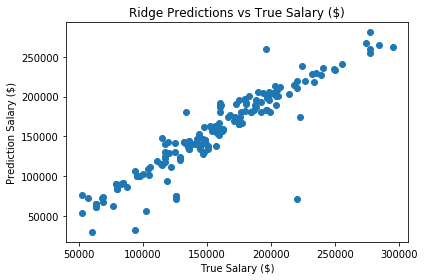

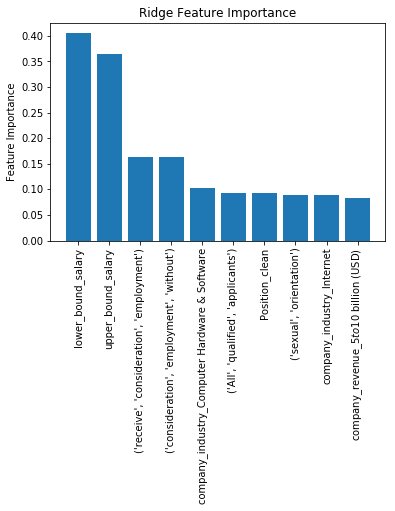

In [35]:
feature_importance_ridge = test_model(test_x,test_y,test_x_norm,test_y_norm,ridge_model,ridge_model_norm,'Ridge')

In [17]:
for fi in feature_importance_ridge:
    print(fi)

NameError: name 'feature_importance_ridge' is not defined

### Lasso

MSE: 0.1782443938046723
MAE: 11860.722822544181
R^2: 0.8542945505495658


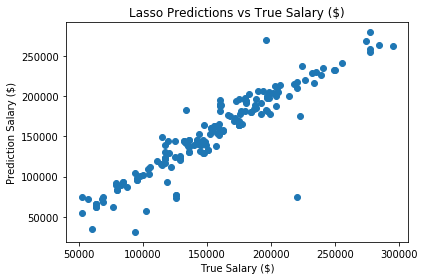

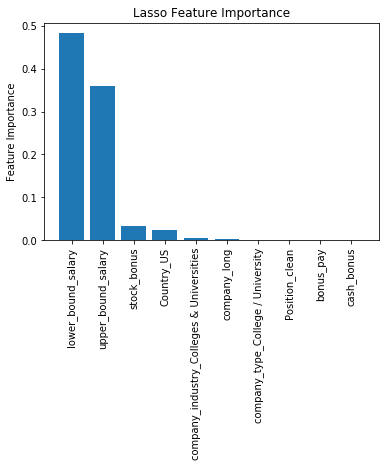

In [37]:
feature_importance_lasso = test_model(test_x,test_y,test_x_norm,test_y_norm,lasso_model,lasso_model_norm,'Lasso')

### Forward Selection - Linear Regression

MSE: 0.13967075467902237
MAE: 11129.846902147287
R^2: 0.8585039512114572


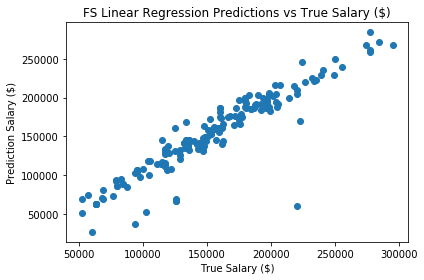

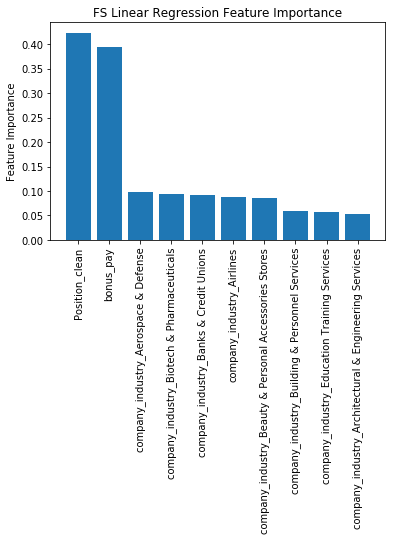

In [38]:
feature_importance_lr = test_model(test_x_fs,test_y,test_x_fs_norm,test_y_norm,lr_model,lr_model_norm,'FS Linear Regression')

In [31]:
for fi in feature_importance_lr:
    print(fi)

['Position_clean', 0.4235054216789545]
['bonus_pay', 0.3946773542334712]
['company_industry_Aerospace & Defense', 0.0981776965352151]
['company_industry_Biotech & Pharmaceuticals', 0.0935151379684087]
['company_industry_Banks & Credit Unions', 0.09113614571610722]
['company_industry_Airlines', 0.08787351293624901]
['company_industry_Beauty & Personal Accessories Stores', 0.0861913441598991]
['company_industry_Building & Personnel Services', 0.05877780319819227]
['company_industry_Education Training Services', 0.05739506307749929]
['company_industry_Architectural & Engineering Services', 0.05381308530869388]
['company_industry_Advertising & Marketing', 0.051032559268597164]
['company_industry_Cable, Internet & Telephone Providers', 0.047250493941824845]
['cash_bonus', 0.046262545971150586]
['company_industry_Accounting', 0.046262545971150544]
['company_industry_Colleges & Universities', 0.03990546463389276]
['company_industry_Chemical Manufacturing', 0.03680355522146672]
['company_indus

In [32]:
preds = lr_model.predict(test_x_fs)

In [33]:
max_sal = 0
max_diff = 0
for i in range(len(test_y)):
    diff = abs(test_y[i]-preds[i])
    if diff > max_diff:
        max_sal = test_y[i]
        max_diff = diff

In [34]:
test_x_fs.columns

Index(['lower_bound_salary', 'upper_bound_salary',
       'company_type_College / University',
       'company_industry_Colleges & Universities', 'stock_bonus', 'Country_US',
       'Position_clean', '('people', 'around', 'world')',
       'company_industry_Computer Hardware & Software',
       'company_industry_Internet', '('learning',)', '('The',)', 'bonus_pay',
       'company_industry_Aerospace & Defense',
       'company_revenue_$100 to $500 million (USD)', '('years', 'experience')',
       'company_industry_Department, Clothing, & Shoe Stores',
       'company_industry_IT Services', '('data', 'sets')', '('machine',)'],
      dtype='object')